In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
sns.set_style('whitegrid')

<h4> Merging the "ratings" and "basics" datasets </h4>
For more information about these datasets, visit <a href=https://www.imdb.com/interfaces/> https://www.imdb.com/interfaces/ </a>

In [2]:
ratings = pd.read_csv(r'datasets/title.ratings.tsv/data.tsv',sep='\t')

In [3]:
basics = pd.read_csv(r'datasets/title.basics.tsv/data.tsv', sep='\t',low_memory=False)

In [4]:
df = pd.merge(basics,ratings,on='tconst')

In [5]:
df.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes
0,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short",5.7,1702
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short",6.1,210
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,\N,4,"Animation,Comedy,Romance",6.5,1458
3,tt0000004,short,Un bon bock,Un bon bock,0,1892,\N,12,"Animation,Short",6.2,123
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,\N,1,"Comedy,Short",6.2,2260


<h3> Data Preprocessing

In [6]:
# Converting 'startYear' and 'endYear' columns to int type

df['startYear'] = [0 if year == '\\N' else int(year) for year in df['startYear']]

df['endYear'] = [year if year == '\\N' else int(year) for year in df['endYear']]

In [7]:
# restricting the dataset to only contain movies that is relased after the year 1960

df = df[df['startYear']>=1960]

In [8]:
# dropping the 'runtimeMinutes' column as it's not a good predictor of ratings

df.drop(['runtimeMinutes'],axis=1,inplace=True)

In [9]:
df.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,genres,averageRating,numVotes
2923,tt0011216,movie,Spanish Fiesta,La fête espagnole,0,2019,\N,Drama,6.3,23
4098,tt0015414,movie,La tierra de los toros,La tierra de los toros,0,2000,\N,\N,5.4,11
4216,tt0015724,movie,Dama de noche,Dama de noche,0,1993,\N,"Drama,Mystery,Romance",6.0,21
4674,tt0016906,movie,Frivolinas,Frivolinas,0,2014,\N,"Comedy,Musical",5.6,15
5264,tt0018295,short,El puño de hierro,El puño de hierro,0,2004,\N,"Action,Drama,Short",6.6,31


In [10]:
# checking what kind of categories are there in the dataset
df['titleType'].value_counts()

tvEpisode       523707
movie           228201
short           111940
tvSeries         74335
video            62808
tvMovie          46587
videoGame        12065
tvMiniSeries     11609
tvSpecial         9591
tvShort           2107
Name: titleType, dtype: int64

In [11]:
# eliminating the categories: 'short','tvShort','tvEpisode','videoGame' from the datasets
def helper_func(title_type):
    if title_type in ['short','tvShort','tvEpisode','videoGame']:
        return np.nan
    else:
        return title_type

In [12]:
df['titleType'] =  df['titleType'].apply(helper_func)

In [13]:
df = df[df['titleType'].notna()]

In [14]:
df['genres'] = df['genres'].apply(lambda x: np.nan if x == '\\N' else x)

In [15]:
df = df[df['genres'].notna()]

In [16]:
df.reset_index(drop=True,inplace=True)

In [17]:
df.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,genres,averageRating,numVotes
0,tt0011216,movie,Spanish Fiesta,La fête espagnole,0,2019,\N,Drama,6.3,23
1,tt0015724,movie,Dama de noche,Dama de noche,0,1993,\N,"Drama,Mystery,Romance",6.0,21
2,tt0016906,movie,Frivolinas,Frivolinas,0,2014,\N,"Comedy,Musical",5.6,15
3,tt0019996,movie,Hongxia,Hongxia,0,2011,\N,Action,6.3,52
4,tt0031458,movie,El huésped del sevillano,El huésped del sevillano,0,1970,\N,Comedy,7.1,8


In [18]:
# saving the preprocessed dataset

df.to_csv('imdb.csv',index=False)

In [19]:
imdb = pd.read_csv('imdb.csv')

In [20]:
imdb.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,genres,averageRating,numVotes
0,tt0011216,movie,Spanish Fiesta,La fête espagnole,0,2019,\N,Drama,6.3,23
1,tt0015724,movie,Dama de noche,Dama de noche,0,1993,\N,"Drama,Mystery,Romance",6.0,21
2,tt0016906,movie,Frivolinas,Frivolinas,0,2014,\N,"Comedy,Musical",5.6,15
3,tt0019996,movie,Hongxia,Hongxia,0,2011,\N,Action,6.3,52
4,tt0031458,movie,El huésped del sevillano,El huésped del sevillano,0,1970,\N,Comedy,7.1,8


<AxesSubplot:xlabel='averageRating', ylabel='Density'>

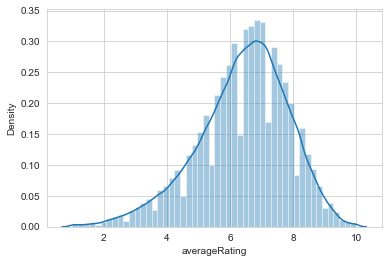

In [21]:
# checking the distribution of the 'averageRating' column 
sns.distplot(imdb['averageRating'])

<AxesSubplot:xlabel='numVotes', ylabel='Density'>

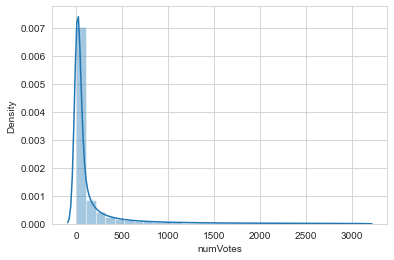

In [22]:
# checking the distribution of the 'numVotes' column 
sns.distplot(imdb['numVotes'][imdb['numVotes']<=3124],bins=30)

In [23]:
# some additional statistics

imdb['numVotes'].describe(percentiles=[0.25,0.75,0.95]).round(2)

count     417691.00
mean        2332.99
std        26516.67
min            5.00
25%           11.00
50%           33.00
75%          170.00
95%         3143.00
max      2388982.00
Name: numVotes, dtype: float64

In [24]:
imdb['averageRating'].describe(percentiles=[0.25,0.75,0.95]).round(2)

count    417691.00
mean          6.41
std           1.45
min           1.00
25%           5.60
50%           6.60
75%           7.40
95%           8.50
max          10.00
Name: averageRating, dtype: float64

In [25]:
# checking the correlation between the columns

imdb.corr()

,isAdult,startYear,averageRating,numVotes
isAdult,1.000000,-0.071484,-0.006562,-0.018703
startYear,-0.071484,1.000000,0.038104,0.011957
averageRating,-0.006562,0.038104,1.000000,0.043058
numVotes,-0.018703,0.011957,0.043058,1.000000


In [26]:
# restricting the dataset to only movies that have a minimum of 2500 votes and an average rating of 6.4
# this ensures users get quality recommendations

imdb = imdb[(imdb['numVotes']>=2500) & (imdb['averageRating']>=6.4)]

In [27]:
imdb.reset_index(drop=True,inplace=True)

In [28]:
imdb.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,genres,averageRating,numVotes
0,tt0035423,movie,Kate & Leopold,Kate & Leopold,0,2001,\N,"Comedy,Fantasy,Romance",6.4,79778
1,tt0052698,movie,Classe Tous Risques,Classe tous risques,0,1960,\N,"Crime,Drama,Romance",7.5,3291
2,tt0052832,movie,The Fugitive Kind,The Fugitive Kind,0,1960,\N,"Drama,Romance",7.1,5687
3,tt0052997,movie,The League of Gentlemen,The League of Gentlemen,0,1960,\N,"Comedy,Crime,Drama",7.3,4055
4,tt0053106,movie,Letter Never Sent,Neotpravlennoe pismo,0,1960,\N,"Adventure,Drama",7.9,3204


In [29]:
imdb['startYear'] = [year if year == '\\N' else int(year) for year in imdb['startYear']]

In [30]:
imdb['endYear'] = [year if year == '\\N' else int(year) for year in imdb['endYear']]

In [31]:
# cleaning up some special characters from the "primaryTitle" column
# Also sorting the dataframe by the 'primaryTitle' column


imdb['primaryTitle'] = imdb['primaryTitle'].apply(lambda x: x.strip("'*"))
bool_mask = imdb['primaryTitle'].str[0].str.isalpha()
alpha_list = imdb['primaryTitle'][bool_mask].sort_values()
non_alpha_list = imdb['primaryTitle'][~bool_mask].sort_values()
imdb = imdb.iloc[alpha_list.append(non_alpha_list).index]

In [32]:
# changing the dataframe's index to the 'tconst' column

imdb.index = imdb['tconst']

In [33]:
# categorizing the following categories 'tvSeries', 'tvMovie', 'tvMiniSeries', 'video', 'tvSpecial' to one entity

tv_shows = ['tvSeries', 'tvMovie', 'tvMiniSeries', 'video', 'tvSpecial']

In [34]:
# splitting movies and tv_shows to different dataframes

movie_df = imdb[imdb['titleType'].apply(lambda x: x not in tv_shows)]

tv_shows_df = imdb[imdb['titleType'].apply(lambda x: x in tv_shows)]

In [35]:
# formatting the titles to include start year and end year if it is a TV show
# if it's a movie then formatting it to include the year it was released

tv_shows_dict = {k: f"{t} ({s})" if s == e else f"{t} ({s}– )" if e =='\\N' else f"{t} ({s}–{e})" for k,t,s,e in tv_shows_df[['primaryTitle','startYear','endYear']].itertuples()}

movie_dict = {k: f"{t} ({s})"  for k,t,s,e in movie_df[['primaryTitle','startYear','endYear']].itertuples()}

In [36]:
# merging them back together

sortedTitle = pd.Series(tv_shows_dict).append(pd.Series(movie_dict))

In [37]:
imdb.reset_index(drop=True, inplace=True)

In [38]:
sortedTitle = pd.DataFrame(sortedTitle).reset_index().rename({'index':'tconst',0:'sortedTitle'},axis=1)

In [39]:
sortedTitle.head()

,tconst,sortedTitle
0,tt0101049,A Bit of Fry and Laurie (1987–1995)
1,tt0385567,A Boyfriend for Christmas (2004– )
2,tt2415112,A Bride for Christmas (2012– )
3,tt0059026,A Charlie Brown Christmas (1965– )
4,tt0068359,A Charlie Brown Thanksgiving (1973– )


In [40]:
imdb = imdb.merge(sortedTitle, on='tconst')

In [41]:
imdb['genres'] = [genre.replace(',', ' ') for genre in imdb['genres']]

In [42]:
imdb['imdb_url'] = imdb['tconst'].apply(lambda titleId: f'https://www.imdb.com/title/{titleId}/')

In [43]:
imdb.reset_index(drop=True, inplace=True)

In [44]:
imdb.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,genres,averageRating,numVotes,sortedTitle,imdb_url
0,tt1509787,movie,A Bag of Hammers,A Bag of Hammers,0,2011,\N,Comedy Drama,6.6,2887,A Bag of Hammers (2011),https://www.imdb.com/title/tt1509787/
1,tt5091612,movie,A Bag of Marbles,Un sac de billes,0,2017,\N,Biography Drama History,7.3,5055,A Bag of Marbles (2017),https://www.imdb.com/title/tt5091612/
2,tt2064713,movie,A Band Called Death,A Band Called Death,0,2012,\N,Biography Documentary Music,7.5,3615,A Band Called Death (2012),https://www.imdb.com/title/tt2064713/
3,tt0067656,movie,A Bay of Blood,Ecologia del delitto,0,1971,\N,Horror Mystery Thriller,6.6,9619,A Bay of Blood (1971),https://www.imdb.com/title/tt0067656/
4,tt3224458,movie,A Beautiful Day in the Neighborhood,A Beautiful Day in the Neighborhood,0,2019,\N,Biography Drama,7.3,65632,A Beautiful Day in the Neighborhood (2019),https://www.imdb.com/title/tt3224458/


In [45]:
# saving the result to a csv file

imdb.to_csv('imdb_sampled.csv', index=False)

<h3> Modelling

<h2> Content Based Filtering </h2>

In [46]:
imdb = pd.read_csv('imdb_sampled.csv')

In [47]:
imdb.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,genres,averageRating,numVotes,sortedTitle,imdb_url
0,tt1509787,movie,A Bag of Hammers,A Bag of Hammers,0,2011,\N,Comedy Drama,6.6,2887,A Bag of Hammers (2011),https://www.imdb.com/title/tt1509787/
1,tt5091612,movie,A Bag of Marbles,Un sac de billes,0,2017,\N,Biography Drama History,7.3,5055,A Bag of Marbles (2017),https://www.imdb.com/title/tt5091612/
2,tt2064713,movie,A Band Called Death,A Band Called Death,0,2012,\N,Biography Documentary Music,7.5,3615,A Band Called Death (2012),https://www.imdb.com/title/tt2064713/
3,tt0067656,movie,A Bay of Blood,Ecologia del delitto,0,1971,\N,Horror Mystery Thriller,6.6,9619,A Bay of Blood (1971),https://www.imdb.com/title/tt0067656/
4,tt3224458,movie,A Beautiful Day in the Neighborhood,A Beautiful Day in the Neighborhood,0,2019,\N,Biography Drama,7.3,65632,A Beautiful Day in the Neighborhood (2019),https://www.imdb.com/title/tt3224458/


In [48]:
# one-hot encoding the 'genres' column

from sklearn.feature_extraction.text import CountVectorizer

In [49]:
cv = CountVectorizer(dtype=np.uint8)

In [50]:
dtm = cv.fit_transform(imdb['genres']).toarray()

In [51]:
dtm.shape

(15131, 30)

In [52]:
dtm[0:5]

array([[0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
        0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0]], dtype=uint8)

In [53]:
# concatenating the above result with the 'averageRating' column to create a feature matrix

feature_matrix = np.concatenate((dtm, np.array(imdb['averageRating']).reshape(-1,1)),axis=1)

In [54]:
from sklearn.preprocessing import MinMaxScaler

In [55]:
MMS = MinMaxScaler()

In [56]:
numVotes = np.array(imdb['numVotes'])

In [57]:
numVotes = numVotes.reshape(-1,1)

In [58]:
# scaling the 'numVotes' column using MinMaxScaler

numVotes = MMS.fit_transform(numVotes)

In [59]:
# appending the above result to the feature matrix

feature_matrix = np.concatenate((feature_matrix,numVotes),axis=1)

In [60]:
from sklearn.metrics.pairwise import cosine_similarity

In [61]:
# building a similarity matrix using cosine similarity metric

similarities = cosine_similarity(feature_matrix,dense_output=False)

In [62]:
similarities.shape

(15131, 15131)

In [63]:
def get_recommendations(title):
    """
    Takes a string as an input and returns a DataFrame of 10 similar items
    """
    try:
        title = title.lower()
        tv_shows = ['tvSeries', 'tvMovie', 'tvMiniSeries', 'video', 'tvSpecial']
        try:
            idx = imdb[imdb['sortedTitle'].apply(lambda x: x.lower())==title].index[0]
        except:
            idx = imdb[imdb['primaryTitle'].apply(lambda x: x.lower())==title].index[0]
             
        recommendations = imdb['sortedTitle'].iloc[similarities[idx].argsort()[::-1]][0:500] # slicing only 500 values for improved performance (process explained below)

        if imdb.iloc[idx]['titleType'] != 'movie':
            tv_recommendations = {rec:[imdb['tconst'].iloc[rec],imdb['sortedTitle'].iloc[rec]] for rec in recommendations.index if imdb['titleType'].iloc[rec] in tv_shows}
            temp =  pd.DataFrame(tv_recommendations).transpose().iloc[1:11]
            temp.rename(columns={0:'tconst',1:'title'},inplace=True)
            temp.reset_index(drop=True, inplace=True)
            return temp.drop('tconst',axis=1)

        else:
            movie_recommendations = {rec:[imdb['tconst'].iloc[rec], imdb['sortedTitle'].iloc[rec]] for rec in recommendations.index if imdb['titleType'].iloc[rec] == 'movie'}
            temp =  pd.DataFrame(movie_recommendations).transpose().iloc[1:11]
            temp.rename(columns={0:'tconst',1:'title'},inplace=True)
            temp.reset_index(drop=True, inplace=True)
            return temp.drop('tconst',axis=1)
    except:
        return None

In [64]:
get_recommendations('Interstellar')

,title
0,The Martian (2015)
1,Children of Men (2006)
2,Chronicle (2012)
3,Time After Time (1979)
4,2001: A Space Odyssey (1968)
5,Arrival (2016)
6,Brazil (1985)
7,Planet of the Apes (1968)
8,A.I. Artificial Intelligence (2001)
9,Close Encounters of the Third Kind (1977)


<h2> Collaborative filtering </h2>

<h4> Read data from the Movielens dataset </h4>
For more info about this dataset visit: <a href=https://grouplens.org/datasets/movielens/100k/> https://grouplens.org/datasets/movielens/100k/ </a>

In [65]:
column_names = ['user_id', 'item_id', 'rating', 'timestamp']
df = pd.read_csv('u.data', sep='\t', names=column_names)

In [66]:
df.head()

,user_id,item_id,rating,timestamp
0,0,50,5,881250949
1,0,172,5,881250949
2,0,133,1,881250949
3,196,242,3,881250949
4,186,302,3,891717742


Note how we only have the item_id, not the movie name. We can use the Movie_ID_Titles csv file to grab the movie names and merge it with this dataframe:

In [67]:
movie_titles = pd.read_csv("Movie_Id_Titles")
movie_titles.head()

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [68]:
df = pd.merge(df,movie_titles,on='item_id')
df.head()

,user_id,item_id,rating,timestamp,title
0,0,50,5,881250949,Star Wars (1977)
1,290,50,5,880473582,Star Wars (1977)
2,79,50,4,891271545,Star Wars (1977)
3,2,50,5,888552084,Star Wars (1977)
4,8,50,5,879362124,Star Wars (1977)


Now let's take a quick look at the number of unique users and movies.

In [69]:
n_users = df.user_id.nunique()
n_items = df.item_id.nunique()

print('Num. of Users: '+ str(n_users))
print('Num of Movies: '+ str(n_items))

Num. of Users: 944
Num of Movies: 1682


## Train Test Split

To evaluate the model this method we'll split our data into two sets. However, we won't do our classic X_train, X_test, y_train, y_test split. Instead we can actually just segement the data into two sets of data:

In [70]:
from sklearn.model_selection import train_test_split
train_data, test_data = train_test_split(df, test_size=0.25)

In [71]:
train_data.head()

,user_id,item_id,rating,timestamp,title
30990,193,69,5,889125287,Forrest Gump (1994)
49710,409,404,2,881109019,Pinocchio (1940)
40876,428,271,2,892572448,Starship Troopers (1997)
47544,846,715,4,883949380,To Die For (1995)
60789,313,161,4,891015319,Top Gun (1986)


Our first step will be to create the user-item matrix. Since we have both testing and training data we need to create two matrices.

In [72]:
#Create two user-item matrices, one for training and another for testing
train_data_matrix = np.zeros((n_users, n_items))
for line in train_data.itertuples():
    train_data_matrix[line[1]-1, line[2]-1] = line[3]  

test_data_matrix = np.zeros((n_users, n_items))
for line in test_data.itertuples():
    test_data_matrix[line[1]-1, line[2]-1] = line[3]

We can use the [pairwise_distances](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.pairwise.pairwise_distances.html) function from sklearn to calculate the cosine similarity. Note, the output will range from 0 to 1 since the ratings are all positive.

In [73]:
from sklearn.metrics.pairwise import pairwise_distances
user_similarity = pairwise_distances(train_data_matrix, metric='cosine')
item_similarity = pairwise_distances(train_data_matrix.T, metric='cosine')

In [74]:
def predict(ratings, similarity, type='user'):
    if type == 'user':
        mean_user_rating = ratings.mean(axis=1)
        #You use np.newaxis so that mean_user_rating has same format as ratings
        ratings_diff = (ratings - mean_user_rating[:, np.newaxis]) 
        pred = mean_user_rating[:, np.newaxis] + similarity.dot(ratings_diff) / np.array([np.abs(similarity).sum(axis=1)]).T
    elif type == 'item':
        pred = ratings.dot(similarity) / np.array([np.abs(similarity).sum(axis=1)])     
    return pred

In [75]:
item_prediction = predict(train_data_matrix, item_similarity, type='item')
user_prediction = predict(train_data_matrix, user_similarity, type='user')

### Evaluation
There are many evaluation metrics but one of the most popular metric used to evaluate accuracy of predicted ratings is *Root Mean Squared Error (RMSE)*. 
<img src="https://latex.codecogs.com/gif.latex?RMSE&space;=\sqrt{\frac{1}{N}&space;\sum&space;(x_i&space;-\hat{x_i})^2}" title="RMSE =\sqrt{\frac{1}{N} \sum (x_i -\hat{x_i})^2}" />

We can use the [mean_square_error](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html) (MSE) function from `sklearn`, where the RMSE is just the square root of MSE.

Since we only want to consider predicted ratings that are in the test dataset, we filter out all other elements in the prediction matrix with `prediction[ground_truth.nonzero()]`. 

In [76]:
from sklearn.metrics import mean_squared_error
from math import sqrt
def rmse(prediction, ground_truth):
    prediction = prediction[ground_truth.nonzero()].flatten() 
    ground_truth = ground_truth[ground_truth.nonzero()].flatten()
    return sqrt(mean_squared_error(prediction, ground_truth))

In [77]:
print('User-based CF RMSE: ' + str(rmse(user_prediction, test_data_matrix)))
print('Item-based CF RMSE: ' + str(rmse(item_prediction, test_data_matrix)))

User-based CF RMSE: 3.118110203364565
Item-based CF RMSE: 3.446176172115203
